#  ***Neural Network-Driven Demand Forecasting and Price Optimization for Enhanced Market Competitiveness***

----------------------

# 1.BUSINESS UNDERSTANDING

## Executive Summary
### Objective: 
- To leverage historical sales and pricing data to optimize pricing strategies and forecast demand for products at a month-year level, ensuring maximum profitability while maintaining competitive market positioning.

### Background: 
- In a dynamic market, understanding demand patterns and setting optimal prices are crucial for staying competitive. Regular feature updates and market fluctuations necessitate a nuanced approach to pricing and inventory management.

### Benefits: 
- Improved pricing strategies will lead to increased revenue, better customer retention, and enhanced market share. Accurate demand forecasting will facilitate more efficient inventory management, reducing stockouts and excess inventory.

### Business Objectives
- Price Optimization: Identify the pricing strategy that maximizes profitability without sacrificing market competitiveness.

- Demand Forecasting:Predict monthly product demand to improve inventory planning and reduce stock issues.

- Market Analysis: Understand how changes in pricing affect demand and identify key factors influencing purchasing decisions.

## Key Stakeholders
- Product Management: Provides insights into product features, updates, and strategic direction.
- Marketing: Interested in demand forecasts to plan campaigns and promotions effectively.
- Sales: Requires accurate pricing and demand forecasts to meet sales targets and manage customer relationships.
- Supply Chain and Inventory Management: Utilizes demand forecasts for efficient inventory management.

## Success Criteria
- A pricing strategy that demonstrates a measurable increase in profitability while maintaining or increasing market share.

## Project Plan
### Phase 1: Data Preparation and Exploration
Tasks:
- Data collection and integration.
- Preliminary data cleaning and preprocessing.
- Exploratory Data Analysis (EDA) to understand trends, patterns, and anomalies.
Timeline: 1 week

### Phase 2: Model Development
Tasks:
- Developing and training models for demand forecasting.
- Developing price optimization algorithms based on historical data and demand elasticity.
Timeline: 3 weeks

### Phase 3: Evaluation and Refinement
Tasks:
- Evaluating model performance against success criteria.
- Refining models and strategies based on feedback and performance metrics.
Timeline: 2 weeks

### Phase 4: Deployment and Monitoring
Tasks:
- Integrating models into business processes (e.g., pricing systems, inventory management workflows).
- Monitoring model performance and market feedback.
- Iteratively updating models and strategies based on new data and market trends.

### Phase 5: Reporting and Feedback Loop
Tasks:
- Regular reporting to stakeholders on model performance, market trends, and business impacts.
- Establishing feedback loops for continuous improvement.

### Deliverables
- A comprehensive report detailing findings from the EDA.
- A working model for demand forecasting with documentation.
- A tool or system for price optimization with guidelines for use.
- Regular performance reports and insights to guide strategic decision-making.

---------------------------------
# 2.DATA AQUISITION AND UNDERSTANDING 

In [5]:
import pandas as pd

# Load the dataset
file_path = '../data/retail_price.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


The dataset contains the following columns relevant to demand and pricing for various products:

- product_id: A unique identifier for each product.

- product_category_name: The category to which the product belongs.

- month_year: The month and year for the data record.

- qty: The quantity sold.

- total_price: The total price for the quantity sold.

- freight_price: The price of freight for the sold items.

- unit_price: The price per unit of the product.

- product_name_lenght, product_description_lenght, product_photos_qty: Attributes related to the product's listing (name length, description length, number of photos).

- Additional columns related to competitors' prices and features (comp_1, ps1, fp1, etc.), which may be used for comparative analysis.

- lag_price: The price of the product in the previous period.

I'll proceed with:

- Exploratory Data Analysis (EDA): To summarize the main characteristics of the dataset, identify missing values, and understand the distribution of key variables.

- Data Visualization: To create visual representations of the data, which can help in understanding trends, patterns, and outliers in product demand and pricing.

- Demand Forecasting: To predict future demand for products based on historical sales data. This may involve time series analysis and machine learning models.

- Price Optimization: To determine the optimal pricing strategy that maximizes profit while considering demand elasticity, competitor pricing, and other factors identified during the EDA.

In [7]:
# Summary statistics for numerical columns
summary_stats = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

summary_stats


,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [8]:
missing_values

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

The exploratory data analysis reveals the following about the dataset:

- The dataset consists of 676 rows and 30 columns.

- There are no missing values in any of the columns, which is ideal for analysis without requiring imputation.

Descriptive statistics provide insights into several variables:
- qty (quantity sold) varies widely, with a mean of approximately 14.5 units and a maximum of 122 units, indicating significant variation in sales volume across products and time.

- total_price and unit_price show considerable variation as well, suggesting a wide range of products with different price points.

- The product_name_length, product_description_length, and product_photos_qty offer insights into how products are presented in the marketplace.

- There's notable variability in the competitor prices (comp_1, comp_2, comp_3) and their respective shipping prices (fp1, fp2, fp3), which might influence pricing strategies.

- lag_price, representing the product price in the previous period, shows a similar variation to unit_price, indicating fluctuating prices over time.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14200\1005393664.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['month_year'] = pd.to_datetime(product_data['month_year'], format='%d-%m-%Y')


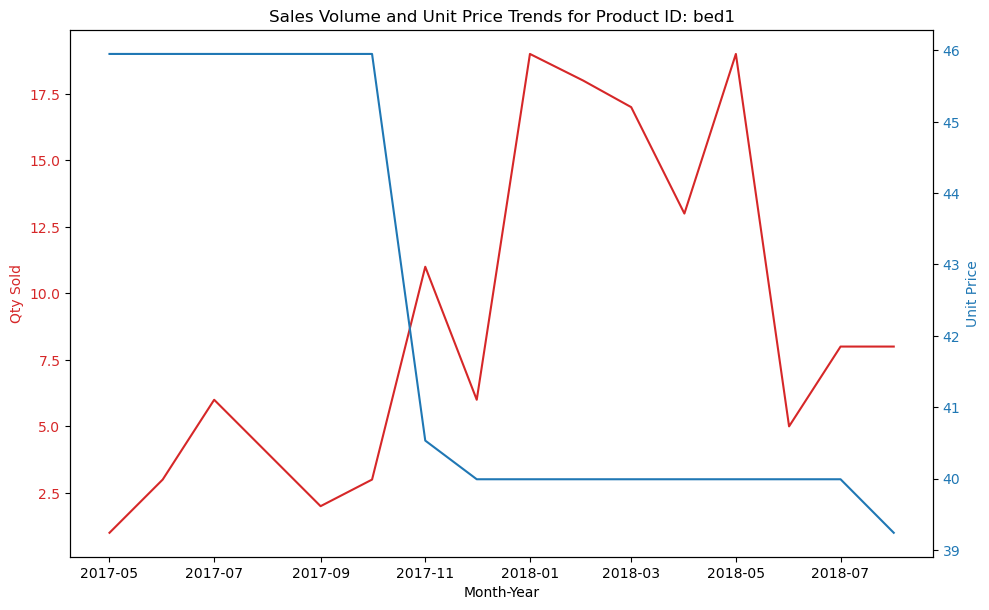

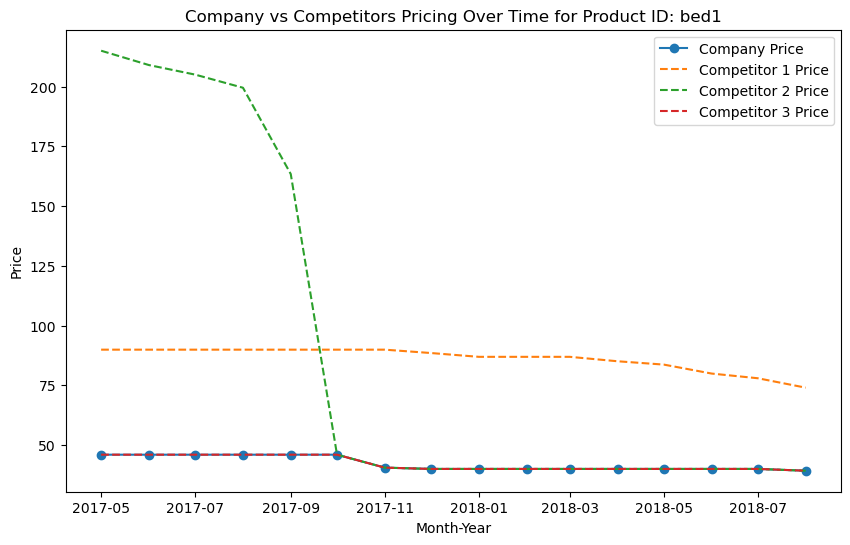

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the first product for visualization
product_id = data['product_id'].iloc[0]

# Filtering data for the selected product
product_data = data[data['product_id'] == product_id]

# Converting month_year to datetime for plotting
product_data['month_year'] = pd.to_datetime(product_data['month_year'], format='%d-%m-%Y')

# Plotting sales volume and unit price trends over time
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Qty Sold', color=color)
ax1.plot(product_data['month_year'], product_data['qty'], color=color, label='Qty Sold')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Unit Price', color=color)  # we already handled the x-label with ax1
ax2.plot(product_data['month_year'], product_data['unit_price'], color=color, label='Unit Price')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(f'Sales Volume and Unit Price Trends for Product ID: {product_id}')
plt.show()

# Plotting the company's pricing compared to competitors over time
plt.figure(figsize=(10, 6))
plt.plot(product_data['month_year'], product_data['unit_price'], label='Company Price', marker='o')
plt.plot(product_data['month_year'], product_data['comp_1'], label='Competitor 1 Price', linestyle='--')
plt.plot(product_data['month_year'], product_data['comp_2'], label='Competitor 2 Price', linestyle='--')
plt.plot(product_data['month_year'], product_data['comp_3'], label='Competitor 3 Price', linestyle='--')
plt.xlabel('Month-Year')
plt.ylabel('Price')
plt.title(f'Company vs Competitors Pricing Over Time for Product ID: {product_id}')
plt.legend()
plt.show()


## Sales Volume and Unit Price Trends

Observation:
- The plot shows the trends for Product ID: bed1 from May 2017 to July 2018.
- The red line represents the sales volume (quantity sold).
- The blue line represents the unit price.
- Both lines exhibit fluctuations over time.

Interpretation:
- Sales Volume (QTY Sold):
- The sales volume experiences significant variations.
- Peaks and valleys suggest seasonal demand changes or other external factors.
- Notably, there is an inverse correlation between sales volume and unit price.
- When the unit price decreases, the sales volume tends to increase.
- Conversely, when the unit price rises, the sales volume decreases.

Unit Price:
- The unit price shows a general decline over the observed period.
- This could be due to market dynamics, competition, or pricing strategies.

Actionable Insights:
Dynamic Pricing:
- Consider implementing dynamic pricing strategies based on demand fluctuations.
- Adjust the unit price to optimize both sales volume and profit margins.

Market Research:
- Investigate the reasons behind the inverse correlation.
- Understand customer preferences and price sensitivity.

Competitor Analysis:
- Analyze competitors’ pricing strategies.
- Benchmark against similar products in the market.

Promotions and Discounts:
- Use targeted promotions or discounts to stimulate sales during low-demand periods.

Monitor Trends:
- Continuously monitor sales trends and adjust strategies accordingly.

## Company vs. Competitors Pricing Over Time:

Observation:
- The plot shows the pricing trends of a company and its three competitors for Product ID: bed1 from May 2017 to July 2018.
- Initially, the company’s price was significantly higher but dropped sharply to align with competitors by September 2017.
- All prices remained relatively stable thereafter.

Interpretation:
- Sales Volume (QTY Sold):
- The company started with a premium pricing strategy.
- However, they quickly adjusted their pricing to match the competitive pricing in the market.
- This shift could be due to initial low sales volume or market feedback.

Unit Price:
- The inverse correlation between sales volume and unit price is evident.
- When the unit price decreases, the sales volume tends to increase, and vice versa.
- Competitors’ prices remained stable during this period.

Actionable Insights:
Evaluate Initial High Price:
- Analyze the impact of the initial high price on brand perception and sales volume.
- Consider whether the premium pricing strategy attracted or deterred customers.

Customer Behavior Analysis:
- Evaluate customer feedback and sales data during both pricing phases.
- Understand buyer behavior and preferences.

Periodic Pricing Reviews:
- Continuously monitor market dynamics, competitor actions, and customer feedback.
- Consider periodic reviews of pricing strategies.

Competitor Benchmarking:
- Analyze competitors’ pricing strategies.
- Identify opportunities for differentiation.

Profitability Optimization:
- Balance competitive pricing with profit margins.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Preparing the time series data
time_series = product_data.set_index('month_year')['qty']

# Function to create dataset with sequences
def create_dataset(data, window_size=3):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series.values.reshape(-1, 1))

# Creating the dataset with sequences
window_size = 3
X, y = create_dataset(scaled_data.flatten(), window_size)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the neural network model
model = Sequential()
model.add(Dense(12, input_dim=window_size, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=0)

# Evaluate the model
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

train_score, test_score


(0.06674106419086456, 0.0900702178478241)

In [13]:
# Predicting future values
# To predict future values, you'll need to use the last window of the actual data as input
last_window = scaled_data[-window_size:].flatten().reshape(1, -1)
future_prediction_scaled = model.predict(last_window)

# Inverse transform to get the actual value
future_prediction = scaler.inverse_transform(future_prediction_scaled)

print(f"Future predicted sales volume: {future_prediction.flatten()[0]}")

1/1 [==============================] - 3s 3s/step
Future predicted sales volume: 10.52617073059082
